In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Reading the CSV file
df = pd.read_csv('./data/bank_telemarketing_data.csv')

In [118]:
df.shape

(11162, 18)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [116]:
palette = {'yes':'green', 'no':'grey'}

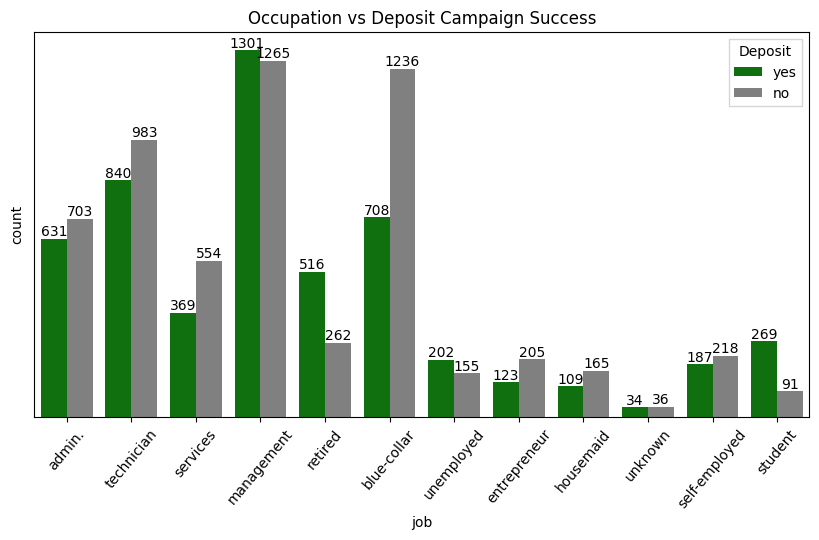

In [121]:
# Plotting a countplot to visualize the relationship between occupation and deposit campaign success
plt.figure(figsize=(10, 5))
plt.title('Occupation vs Deposit Campaign Success')

# Using seaborn to create a countplot
g = sns.countplot(x='job', hue='deposit', data=df, palette=palette)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=50)

# Removing y-axis ticks for cleaner appearance
plt.yticks([])

# Adding legend with deposit categories
plt.legend(title='Deposit', ncol=1, fancybox=False, shadow=False)

# Adding labels to the bars
for container in g.containers:
    g.bar_label(container, padding=0)

# Displaying the plot
plt.show()

Occupation Impact on Deposit Acceptance: Students and Retirees Say Yes, Blue Collars Say No

We can see that customers with job type as 'student' or 'retired' tends to accept the deposit, while 'blue collars' largely refused the deposit.

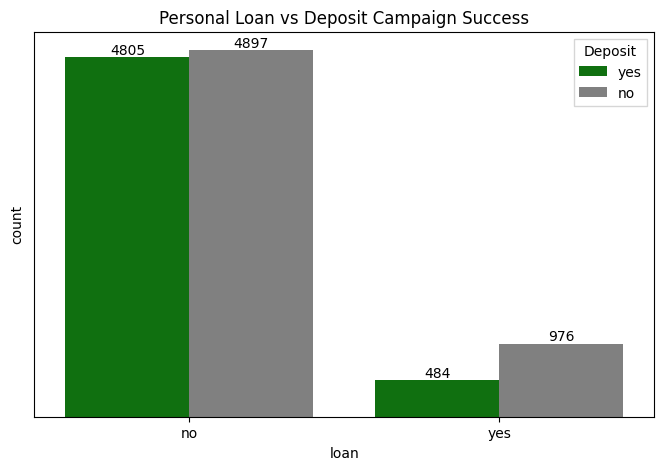

In [122]:
# Plotting a countplot to visualize the relationship between personal loan and deposit campaign success
plt.figure(figsize=(8, 5))
plt.title('Personal Loan vs Deposit Campaign Success')

# Using seaborn to create a countplot
g = sns.countplot(x='loan', hue='deposit', data=df, palette=palette)

# Adding legend with deposit categories
plt.legend(title='Deposit', ncol=1, fancybox=False, shadow=False)

# Adding labels to the bars
for container in g.containers:
    g.bar_label(container, padding=0)

# Removing y-axis ticks for cleaner appearance
plt.yticks([])

# Displaying the plot
plt.show()

Personal Loan Holders More Likely to Refuse Deposit Offer

It looks like that customers with a personal loan tends to refuse the deposit

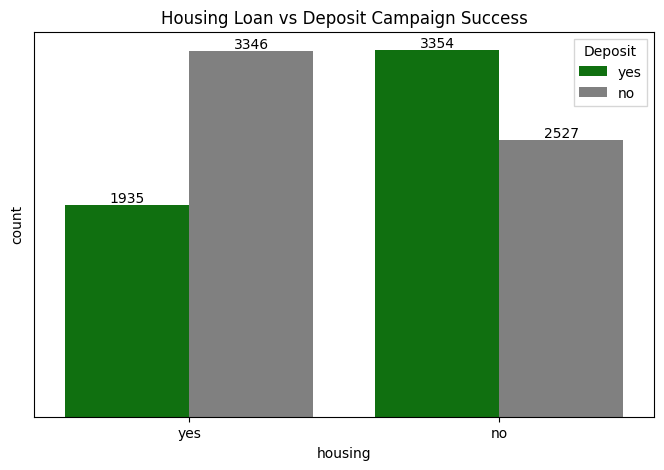

In [123]:
# Plotting a countplot to visualize the relationship between housing loan and deposit campaign success
plt.figure(figsize=(8, 5))
plt.title('Housing Loan vs Deposit Campaign Success')

# Using seaborn to create a countplot
g = sns.countplot(x='housing', hue='deposit', data=df, palette=palette)

# Adding legend with deposit categories
plt.legend(title='Deposit', ncol=1, fancybox=False, shadow=False)

# Removing y-axis ticks for cleaner appearance
plt.yticks([])

# Adding labels to the bars
for container in g.containers:
    g.bar_label(container, padding=0)

# Displaying the plot
plt.show()

Housing Loan Absence Correlates with Higher Deposit Acceptance

Customers without a Housing Loan tends to accept the deposit.

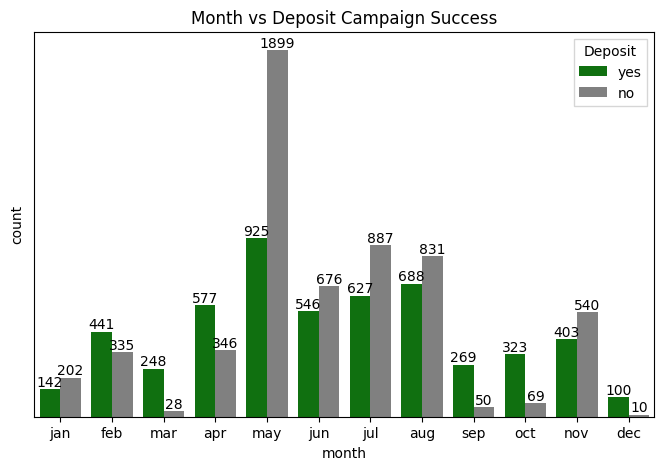

In [111]:
# Plotting a countplot to visualize the relationship between month and deposit campaign success
plt.figure(figsize=(8, 5))
plt.title('Month vs Deposit Campaign Success')

# Using seaborn to create a countplot with a specific order of months
g = sns.countplot(x='month', hue='deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], palette=palette)

# Adding legend with deposit categories
plt.legend(title='Deposit', ncol=1, fancybox=False, shadow=False)

# Removing y-axis ticks for cleaner appearance
plt.yticks([])

# Adding labels to the bars
for container in g.containers:
    g.bar_label(container, padding=0)

# Displaying the plot
plt.show()

Deposit Acceptance Peaks in March, April, September, and October

It looks like that customers tends to accept more the deposit on march, april, september and october.

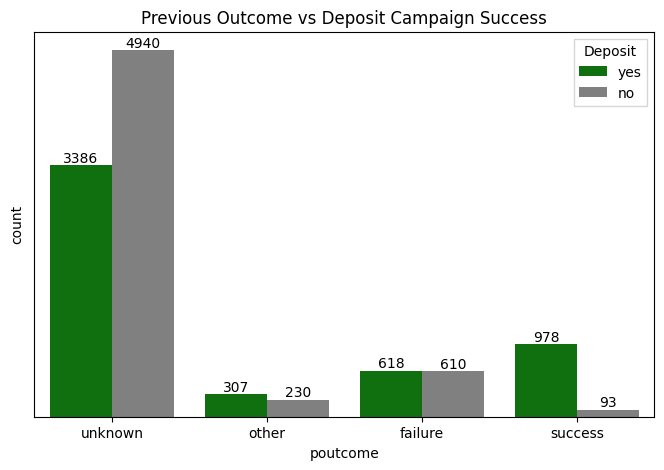

In [112]:
# Plotting a countplot to visualize the relationship between previous outcome and deposit campaign success
plt.figure(figsize=(8, 5))
plt.title('Previous Outcome vs Deposit Campaign Success')

# Using seaborn to create a countplot
g = sns.countplot(x='poutcome', hue='deposit', data=df, palette=palette)

# Adding legend with deposit categories
plt.legend(title='Deposit', ncol=1, fancybox=False, shadow=False)

# Removing y-axis ticks for cleaner appearance
plt.yticks([])

# Adding labels to the bars
for container in g.containers:
    g.bar_label(container, padding=0)

# Displaying the plot
plt.show()

Previous Deposit Acceptance Strongly Predicts Future Acceptance

We can see that customers who previously accepted the deposit tends to accept the deposit by a large margin.

In [124]:
df['age_cate'] = pd.cut(df['age'], bins=[0, 25, 45, 65, float('Inf')], labels=['0-25', '25-45', '45-65', '65-100'])

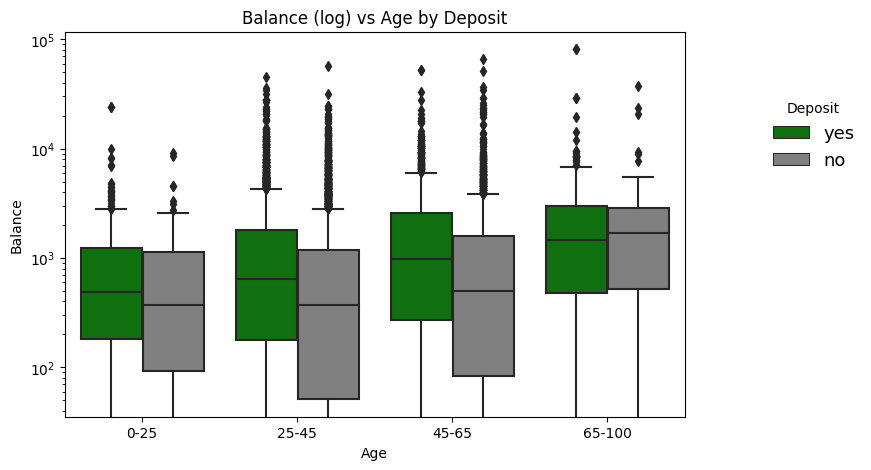

In [125]:
# Plotting a boxplot to visualize the relationship between age category, balance, and deposit campaign success
plt.figure(figsize=(8, 5))
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=df, palette=palette)

# Adding labels and title
plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('Balance (log) vs Age by Deposit')

# Using log scale for better visibility of balance distribution
plt.yscale('log')

# Adding legend with deposit categories
plt.legend(bbox_to_anchor=(1.3, 0.6), title='Deposit', loc='lower right', fontsize=13, fancybox=False, shadow=False, frameon=False)

# Displaying the plot
plt.show()

Age and Bank Balance Trends: Older Customers and Deposit Acceptance

From this plot we can see that older customers tends to have a higher bank balance and that customers who accepted the deposit tended to have a higher balance compared to the customers who refused the deposit.

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
# Define features and target
X = df.drop(columns=['deposit'])
y = df['deposit']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define numerical and categorical features
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'contact', 'poutcome']

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
# Create a pipeline with preprocessing and a Logistic Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])


In [10]:
# Train the model
model.fit(X_train, y_train)

/Users/tirthpatel/miniconda3/envs/cs672/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'day']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'month',
                                                   'contact', 'poutcome'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [17]:
count_yes = y_test[y_test == 'yes'].count()
count_no = y_test[y_test == 'no'].count()

print(f'Count of "yes" in y_test: {count_yes}')
print(f'Count of "no" in y_test: {count_no}')

Count of "yes" in y_test: 1067
Count of "no" in y_test: 1166


In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[972 194]
 [234 833]]
              precision    recall  f1-score   support

          no       0.81      0.83      0.82      1166
         yes       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [18]:
# Make predictions on the test set
X_pred = model.predict(X_train)

In [19]:
# Evaluate the model
print(confusion_matrix(y_train, X_pred))
print(classification_report(y_train, X_pred))

[[4050  657]
 [ 863 3359]]
              precision    recall  f1-score   support

          no       0.82      0.86      0.84      4707
         yes       0.84      0.80      0.82      4222

    accuracy                           0.83      8929
   macro avg       0.83      0.83      0.83      8929
weighted avg       0.83      0.83      0.83      8929



In [20]:
count_yes = y_train[y_train == 'yes'].count()
count_no = y_train[y_train == 'no'].count()

print(f'Count of "yes" in y_test: {count_yes}')
print(f'Count of "no" in y_test: {count_no}')

Count of "yes" in y_test: 4222
Count of "no" in y_test: 4707


In [25]:
model.classes_

array(['no', 'yes'], dtype=object)

In [28]:
# Get the logistic regression model from the pipeline
logreg_model = model.named_steps['classifier']

# Get the coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat']
                                        .named_steps['onehot'].get_feature_names_out(categorical_features))

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of coefficients in descending order
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the sorted DataFrame
print(coefficients_df)

                Feature  Coefficient  Absolute Coefficient
2              duration     1.910408              1.910408
39            month_mar     1.709091              1.709091
49     poutcome_success     1.700682              1.700682
34            month_dec     1.365149              1.365149
36            month_jan    -1.258999              1.258999
41            month_nov    -1.066538              1.066538
46      contact_unknown    -1.045238              1.045238
37            month_jul    -1.024631              1.024631
42            month_oct     1.000338              1.000338
43            month_sep     0.983086              0.983086
33            month_aug    -0.914661              0.914661
50     poutcome_unknown    -0.820873              0.820873
40            month_may    -0.725078              0.725078
44     contact_cellular     0.566529              0.566529
15          job_student     0.539683              0.539683
47     poutcome_failure    -0.477569              0.4775